# Clustering Geospatial Data

In this tutorial we will learn how to use scikit-learn library to perform clustering on geo-spatial data.

We will use the “Starbucks Stores dataset” that provides the location of all the stores in operation (link below). We shall select a particular geographic area and use the latitude and longitude provided to spatially cluster the Starbucks store locations.

As mentioned there are many clustering algorithms available. We will use the K-Means as an example in this tutorial.

```{Note}

    An end-to-end Scikit-learn workflow for clustering data:
        1. Get the data ready
        2. Choose the right model and hyperparameters
        3. Fit the model to the data and make predictions
        4. Evaluate the model
        5. Improve the model
        6. Save and load a trained model
        7. Put it all together!

```

## Data Preparation

### Setup
First of all, I need to import the following packages.

In [1]:
import warnings
warnings.filterwarnings('ignore')

## for data
import numpy as np
import pandas as pd

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for geospatial
import folium

## for machine learning
from sklearn import preprocessing, cluster



Then we have to read the data into a pandas Dataframe.

In [2]:
dtf = pd.read_csv('data_stores.csv')

dtf.head(3)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39


The original dataset contains over 5,000 cities and 25,000 stores, but for the purpose of this tutorial, we will work with just one city.

In [3]:
filter = "Calgary"

dtf = dtf[dtf["City"]==filter][["City","Longitude","Latitude"]].reset_index(drop=True)
dtf = dtf.reset_index().rename(columns={"index":"id"})

dtf.head()


,id,City,Longitude,Latitude
0,0,Calgary,-114.06,51.05
1,1,Calgary,-114.07,51.04
2,2,Calgary,-114.07,51.05
3,3,Calgary,-114.07,51.05
4,4,Calgary,-114.08,51.05


## Visualization on Map

In [4]:
# visualize all the stores locations on foiium map
f = folium.Figure(width=750, height=750)
map_ = folium.Map(location=[dtf['Latitude'].mean(), dtf['Longitude'].mean()], zoom_start=11, tiles="cartodbpositron").add_to(f)
for i in range(0, dtf.shape[0]):
    folium.Marker([dtf.iloc[i]['Latitude'], dtf.iloc[i]['Longitude']], 
                  popup=dtf.iloc[i]['City']).add_to(map_)
map_

## Clustering Using K-Means

### Fitting the model

As we mentioned, for k_means we need to define the number of clusters.
For the first iteration, we will arbitrarily choose a number of clusters (referred to as k) of 5. 

Building and fitting models in sklearn is very simple. We will create an instance of KMeans, define the number of clusters using the `n_clusters` attribute, set `n_init`, which defines the number of iterations the algorithm will run with different centroid seeds, and we will set the `random_state` to 0 so we get the same result each time we run the code.  

We can then fit the model to the normalized training data using the fit() method.




In [5]:
# define the number of clusters
n_clusters = 5

# define the kmeans algorithm
kmeans = cluster.KMeans(
    n_clusters=n_clusters, # how many clusters
    init='k-means++', # initialization
    max_iter=300, # maximum number of iterations for each run
    n_init=10, # number of times the k-means algorithm will be run with different centroid seeds
    random_state=0 # the random number generator
    )

#create the X matrix
X = dtf[["Longitude","Latitude"]]

# fit the model
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=0)

Once the data are fit, we can access labels from the `labels_` attribute which is the label assignemt to each elemnt of the data (X). 

Below, we create a new column in our dataset to add the culster label corresponding to each row into the dataframe.

Then we can use the cluster label to visualize the data we just fit. 




In [7]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 2, 3, 4, 3, 0, 1, 2, 0, 2, 4, 0, 2, 3, 4, 3, 1,
       0, 0, 0, 0, 4, 2, 0, 3, 4, 2, 3, 2, 3, 4, 0, 2, 0, 3, 0, 4, 0, 0,
       0, 3, 2, 0, 1, 4, 0, 1, 0, 1, 4, 0, 3, 3, 4, 4, 0, 4, 3, 0, 4, 4,
       0, 0, 3, 1, 0, 2, 2, 4, 0, 4, 1, 2, 4, 2, 2, 0, 3, 2, 2, 2, 0, 0,
       0, 3, 3, 0, 3, 2, 4, 2, 2, 2, 2, 1, 2, 0, 2, 3, 2, 3, 0, 0, 0, 4,
       1, 0, 0, 0, 0, 2, 0, 0, 3, 2, 2, 2, 0, 3, 0, 0, 3, 0, 0, 2])

In [9]:


# predict add cluster information to the dataframe
dtf['cluster_label'] = kmeans.labels_


# visualize the clusters

# create the folium object
f = folium.Figure(width=750, height=750)
# initialize the map on the mean coordinates of the stores
map_ = folium.Map(location=[dtf['Latitude'].mean(), dtf['Longitude'].mean()], zoom_start=11, tiles="cartodbpositron").add_to(f)
# create a color palette for the clusters based on the number of clusters
colors = sns.color_palette("Set2", n_colors=n_clusters).as_hex()
# add the stores to the map and color them based on the cluster they belong to
for i in range(0, dtf.shape[0]):
    folium.Circle(
        location=[dtf.iloc[i]['Latitude'], dtf.iloc[i]['Longitude']],
        color=colors[dtf.iloc[i]['cluster_label']], 
        fill=True,
        fill_color=colors[dtf.iloc[i]['cluster_label']],
        radius=200).add_to(map_)
map_

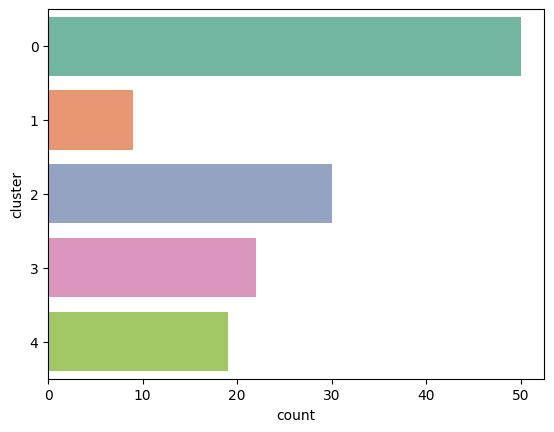

In [30]:
# We can also see how the clusters are distributed by plotting the number of stores per cluster
fig, ax = plt.subplots()
sns.countplot(y="cluster_label", data=dtf, palette=colors)
ax.set_xlabel("count")
ax.set_ylabel("cluster")
plt.show()

### Evaluating the model

We can see that the cluster 0 has the highest number of stores, while the cluster 1 has the lowest number of stores.

But how do we know if the clusters are meaningful? We can use the silhouette score to evaluate the quality of the clusters. 

The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

In [31]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_, metric='euclidean')

0.4987806436506213

Since we have not looked at the strength of different numbers of clusters, we do not know how good of a fit the k = 5 model is. In the next section, we will explore different clusters and compare performance to make a decision on the best hyperparameter values for our model.

## Find the best number of clusters using the elbow method and silhouette score

The weakness of k-means clustering is that we don’t know how many clusters we need by just running the model. We need to test ranges of values and make a decision on the best value of k. We typically make a decision using the Elbow method to determine the optimal number of clusters where we are both not overfitting the data with too many clusters, and also not underfitting with too few. 

In this part, instead of random number of clusters, we will use the elbow method and silhouette score to find the best number of clusters. The higher silhouette score means the better clustering. Som we need to find the number of clusters that maximize the silhouette score.
We use a for loop to fit the model with different number of clusters and then we calculate the silhouette score for each model.
then we plot the silhouette score for each model and we choose the number of clusters that gives the highest silhouette score.

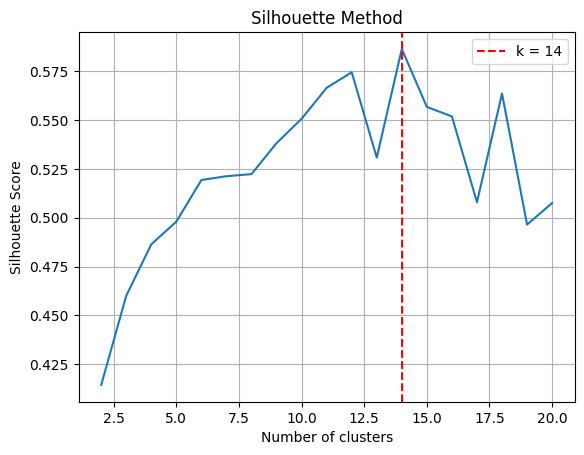

In [6]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

# calculate the silhouette score
sil = []
# define the range of clusters to test
kmax = 20
# fit the model for each number of clusters
for k in range(2, kmax+1):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))


# find the best number of clusters that maximizes the silhouette score
k = np.argmax(sil)+2

# plot the silhouette score
fig, ax = plt.subplots()
plt.plot(range(2, kmax+1), sil)
plt.axvline(k, ls='--', color="red", label="k = "+str(k))
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()


## Use matplotlib to plot all clustering results for all number of clusters

Now that we are using a for loop to find the best number of clusters, we can plot all the clustering results as the same time to get better sense of different clustering results with different number of clusters.

We also use the k-means centroids to see the location of centriod of each cluster

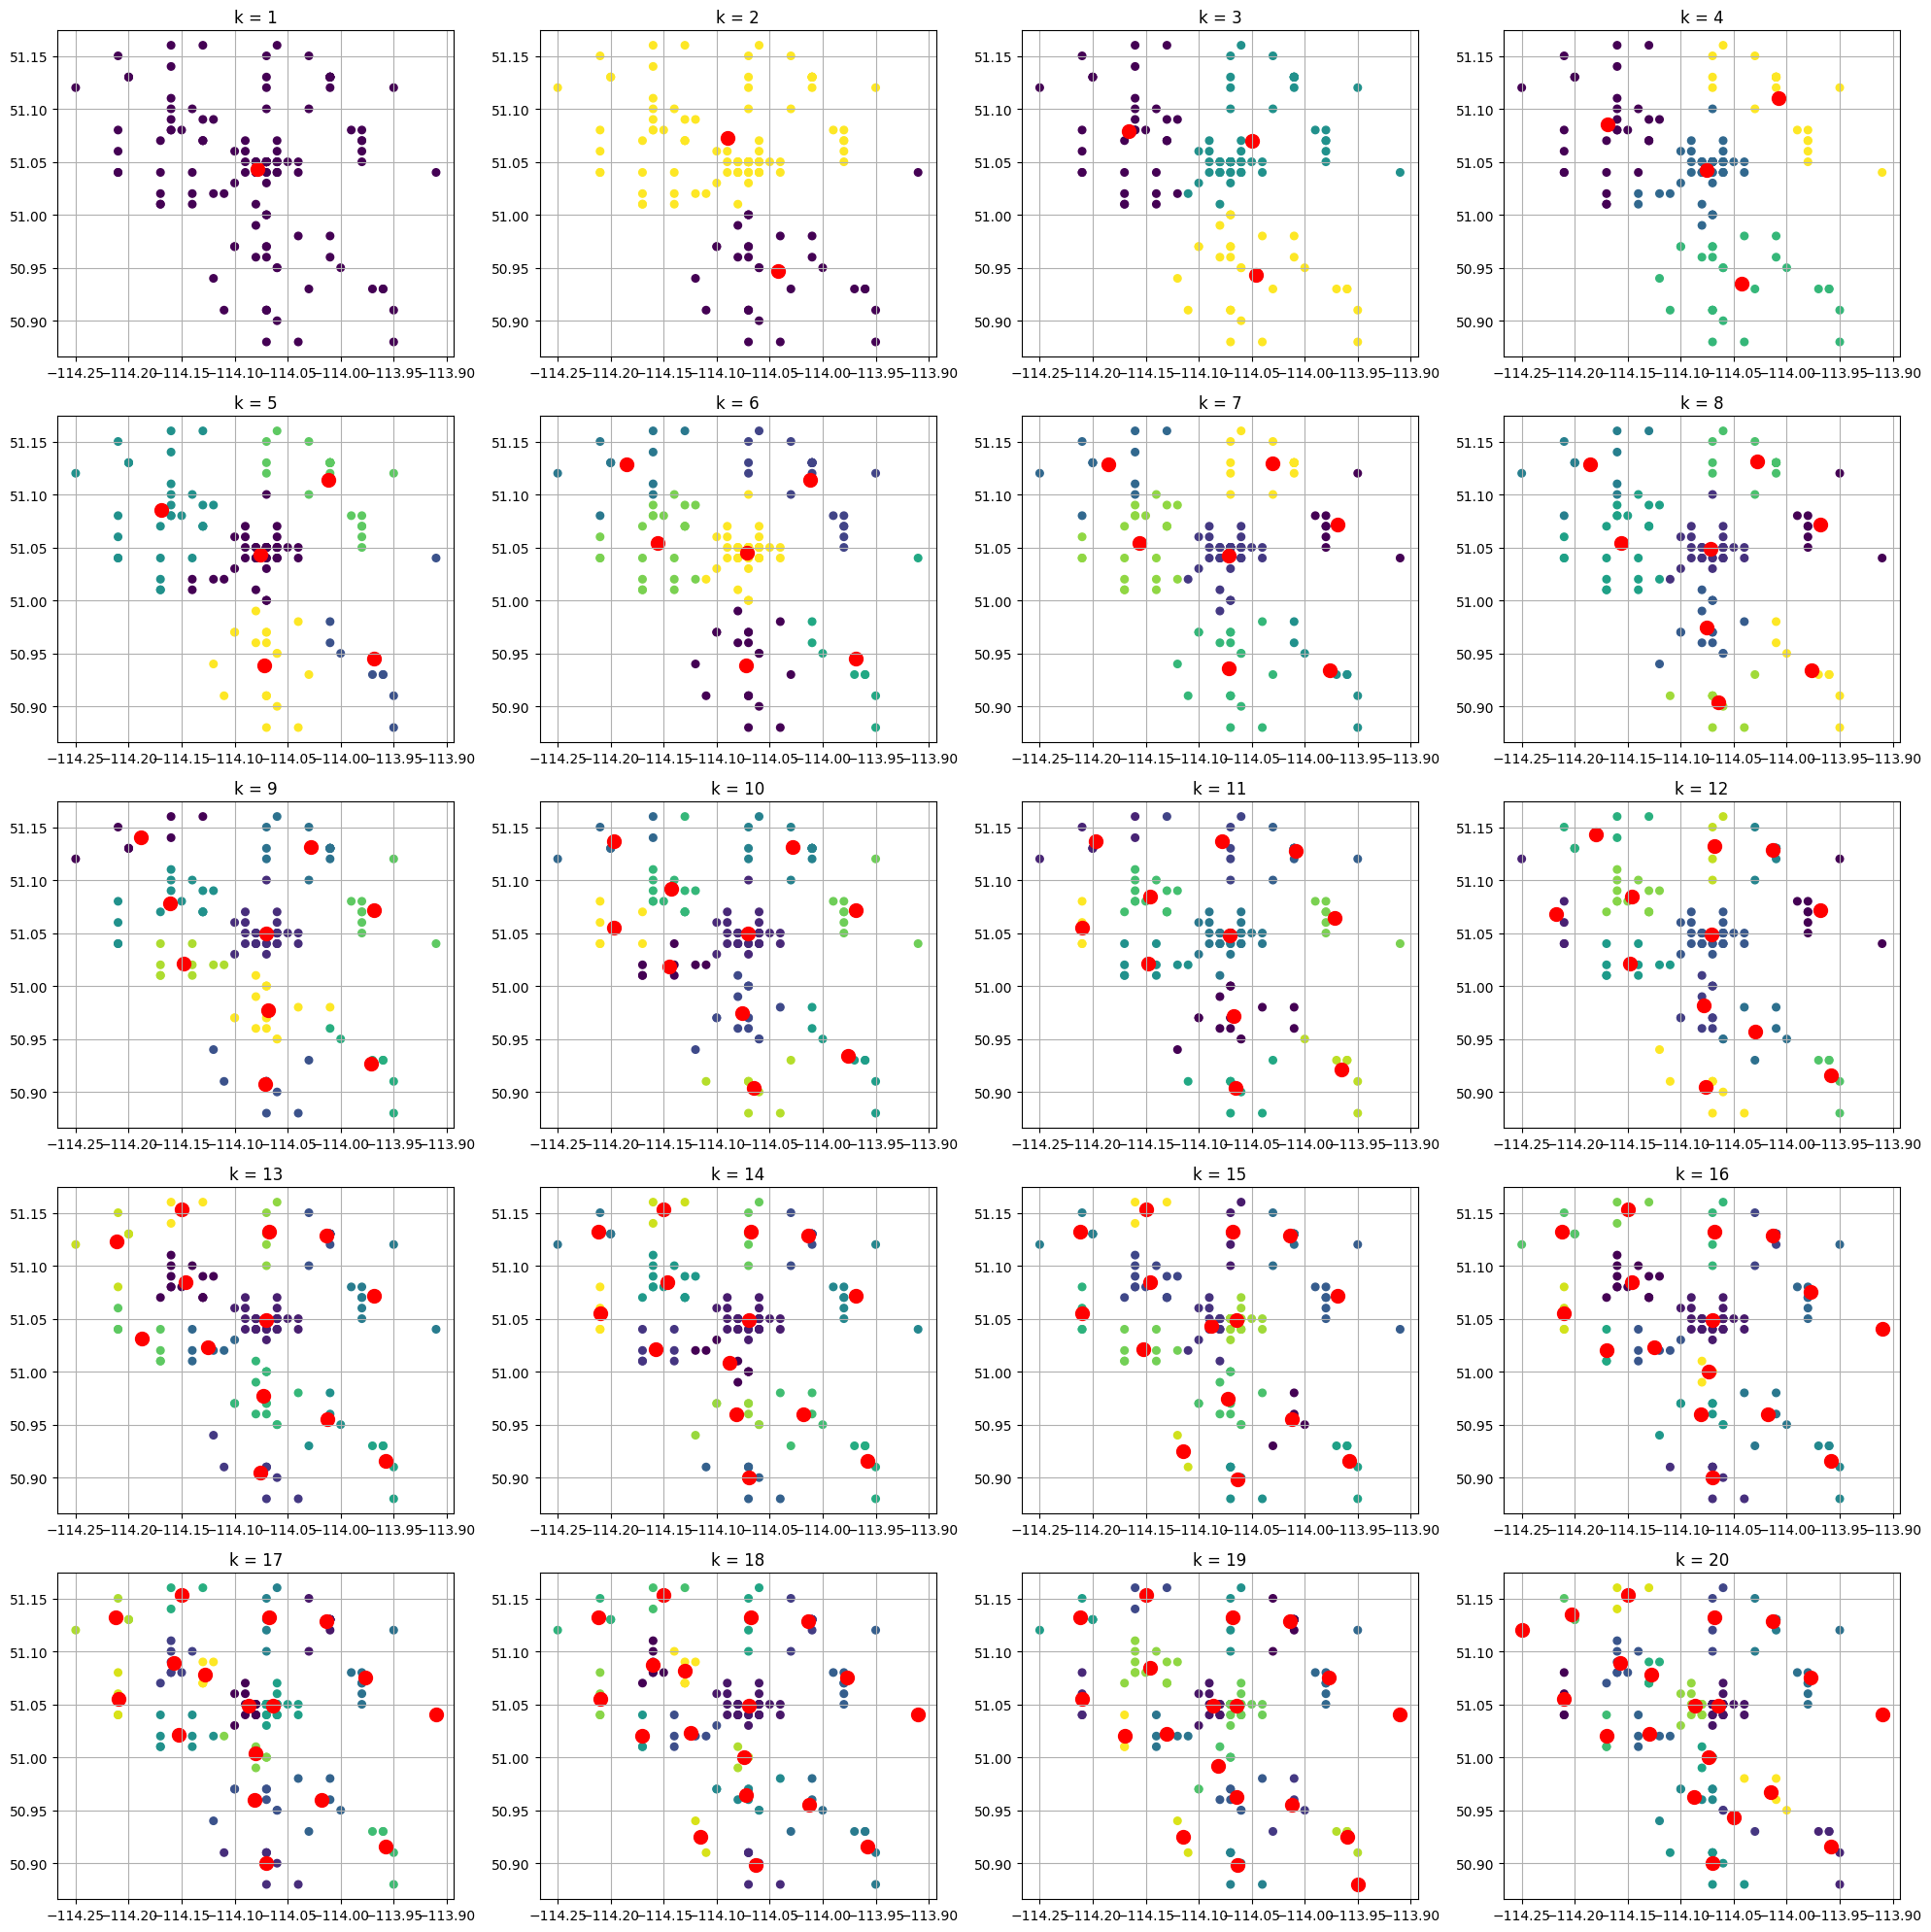

In [32]:
# perform k means clustering from 1 cluster to 20 and plot the results with plt each cluster has same color
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# plot the clusters
fig, ax = plt.subplots(5, 4, figsize=(20, 20))
ax = ax.ravel()
centers = []
# fit the model for each number of clusters
for i in range(1, 21):
    model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    model.fit(X)
    # save the cluster centers
    centers.append(model.cluster_centers_)
    # predict the cluster for each data point
    y = model.predict(X)
    # plot the data points with color based on the cluster they belong to
    ax[i-1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, cmap='viridis')
    # plot the centers of the clusters
    ax[i-1].scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='red')
    # set the title
    ax[i-1].set_title('k = '+str(i))
    ax[i-1].grid(True)
plt.tight_layout()
plt.show()

## Plotting the Results on Interactive Map

Now let assume that from the elbow method we get the optimum number of clusters, then we can fit the model and visualize the results on the interactive map.
For this purpose, we will use the folium library to create a map and visualize the clusters with different colors and show the centroid of each cluster with a red marker

In [33]:
# do the kmans clustering base on k=12 (assumed to be the best number of clusters)
n_clusters = 12

# define the kmeans algorithm with the best number of clusters and fit the model
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# add the cluster label to the dataframe and the real centroids lat and lon to the dataframe 
dtf_clustered = dtf.copy()
dtf_clustered["cluster_number_kmeans"] = kmeans.fit_predict(X)

# find the real centroids lat and lon
real_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
real_centroids["cluster_number_kmeans"] = real_centroids.index
real_centroids["Latitude_centroid"] = real_centroids["Latitude"]
real_centroids["Longitude_centroid"] = real_centroids["Longitude"]

# add cluster label and centroids to the restaurants
dtf_clustered = pd.merge(dtf_clustered, real_centroids[["cluster_number_kmeans", "Latitude_centroid", "Longitude_centroid"]], on="cluster_number_kmeans", how="left")

# display the restaurants first 3 rows
dtf_clustered.head(3)

,id,City,Longitude,Latitude,cluster_label,cluster_number_kmeans,Latitude_centroid,Longitude_centroid
0,0,Calgary,-114.06,51.05,0,3,51.048293,-114.070732
1,1,Calgary,-114.07,51.04,0,3,51.048293,-114.070732
2,2,Calgary,-114.07,51.05,0,3,51.048293,-114.070732


In [34]:
# plot the points on map with folium with their cluster centroids, each cluster members have the same color
f = folium.Figure(width=750, height=750)
map_ = folium.Map(location=[51.0447, -114.0719], tiles='cartodbpositron', zoom_start=10).add_to(f)

# define color list for the clusters based on the number of clusters
color_list = sns.color_palette("Set2", n_colors=n_clusters).as_hex()

# add the stores to the map and color them based on the cluster they belong to
for i in range(len(dtf_clustered)):
    location = [dtf_clustered['Latitude'].iloc[i], dtf_clustered['Longitude'].iloc[i]]
    folium.CircleMarker(location, radius=5, color=color_list[int(dtf_clustered['cluster_number_kmeans'].iloc[i])], fill=True, fill_color=color_list[int(dtf_clustered['cluster_number_kmeans'].iloc[i])]).add_to(map_)
    
# add the centroids to the map as markers   
for i in range(len(real_centroids)):
    location = [real_centroids['Latitude_centroid'].iloc[i], real_centroids['Longitude_centroid'].iloc[i]]
    folium.Marker(location, popup="cluster_number_kmeans "+str(real_centroids['cluster_number_kmeans'].iloc[i])).add_to(map_)
    
map_